<a href="https://colab.research.google.com/github/LynnMuchiri/KEnyan-SignLanguage/blob/main/SignLanguage_KSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required libraries


In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.8/906.8 kB 37.3 MB/s eta 0:00:00


In [2]:
import os

In [3]:
import glob

In [4]:
from IPython.display import Image, display

In [5]:
from IPython import display

In [6]:
display.clear_output()

Checking access to GPU

In [7]:
!nvidia-smi

Sun Jan 12 05:01:07 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [8]:
Home = os.getcwd()

In [9]:
print(Home)

/content


Check the installation of Yolov8

In [10]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


Importing the Kenya Sign Language dataset from Roboflow

In [11]:
!mkdir {Home}/datasets
%cd {Home}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xLxRGzFLK4o3WvaluLzH")
project = rf.workspace("finalproject-r7tzq").project("ksl_sign_language_detection")
version = project.version(2)
dataset = version.download("yolov8")



/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ksl_sign_language_detection-2 in yolov8:: 100%|██████████| 6670/6670 [00:01<00:00, 6599.53it/s]


In [12]:
%cd {Home}

/content


In [13]:
%cd {dataset.location}

/content/datasets/ksl_sign_language_detection-2


In [14]:
%cd {Home}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

/content
100% 21.5M/21.5M [00:00<00:00, 229MB/s]
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/ksl_sign_language_detection-2/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

In [15]:
!ls {Home}/runs/detect/train/

args.yaml					   R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			   results.csv		val_batch0_pred.jpg
confusion_matrix.png				   results.png		val_batch1_labels.jpg
events.out.tfevents.1736658137.5265d65e9260.762.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					   train_batch1730.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				   train_batch1731.jpg	val_batch2_pred.jpg
labels.jpg					   train_batch1732.jpg	weights
P_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch2.jpg


Display Confusion Matrix

/content


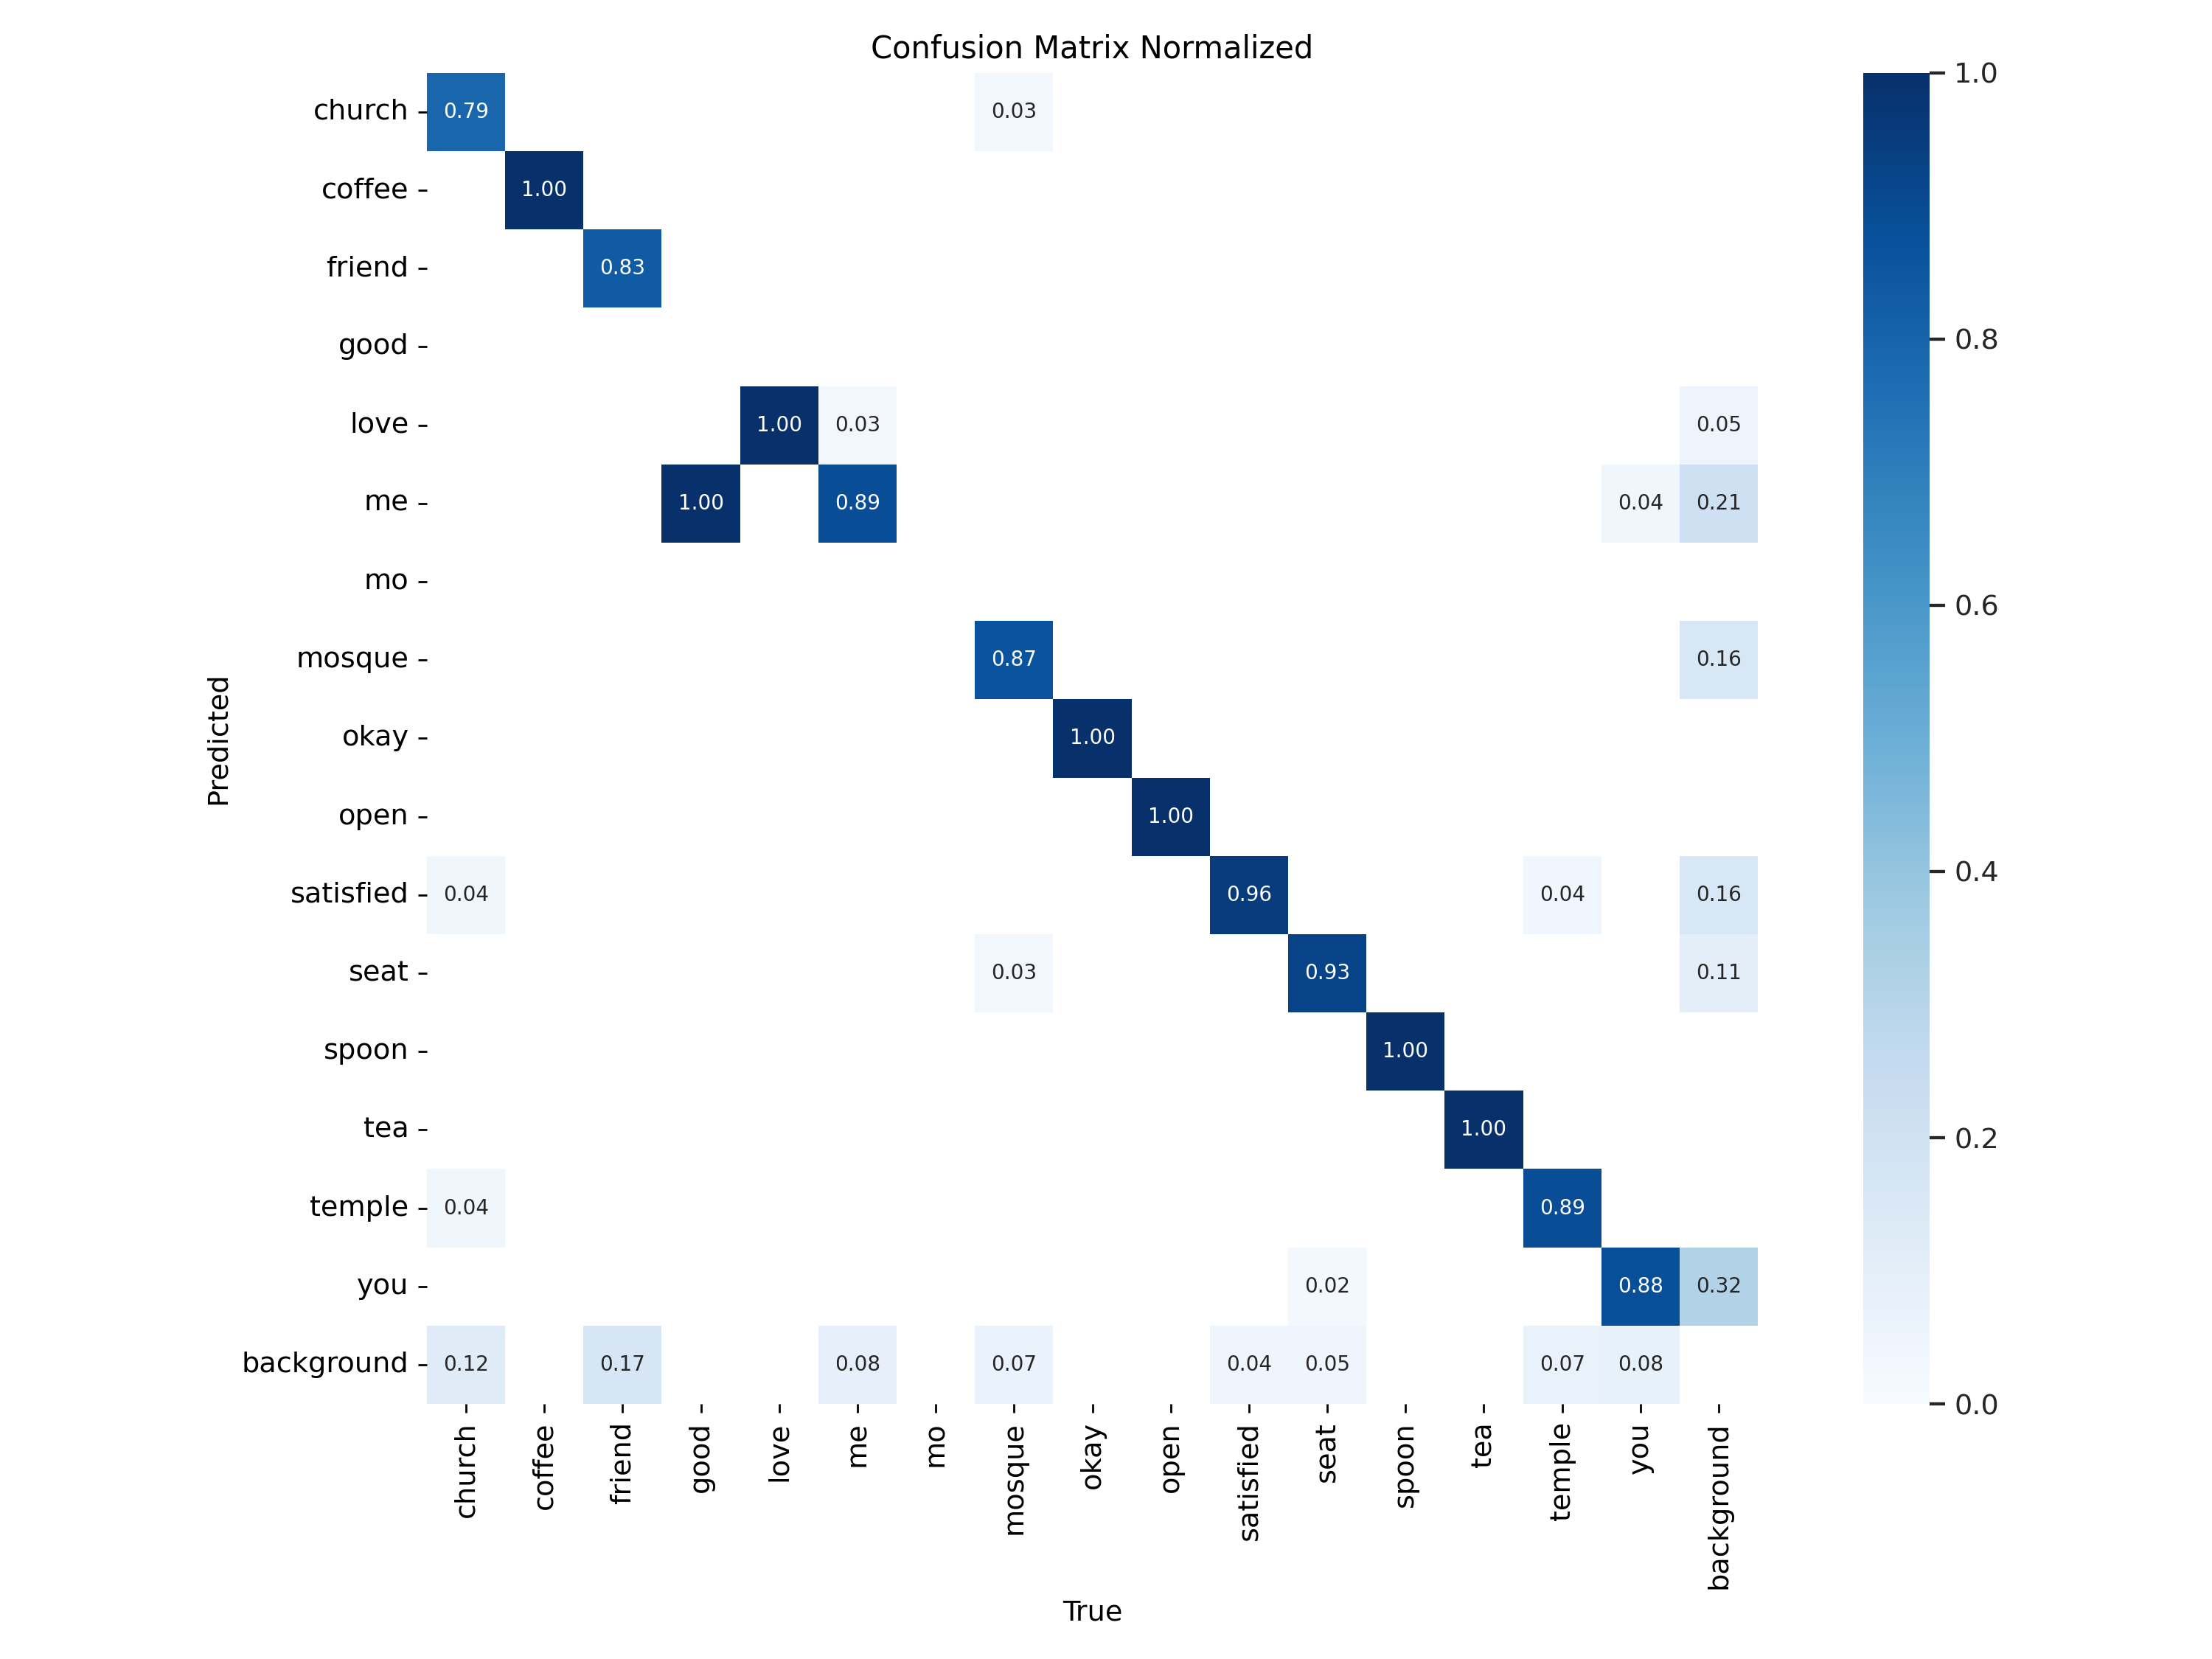

In [16]:
%cd {Home}

Image(filename=f'{Home}/runs/detect/train/confusion_matrix_normalized.png', width=800)


Training and Validation loss

/content


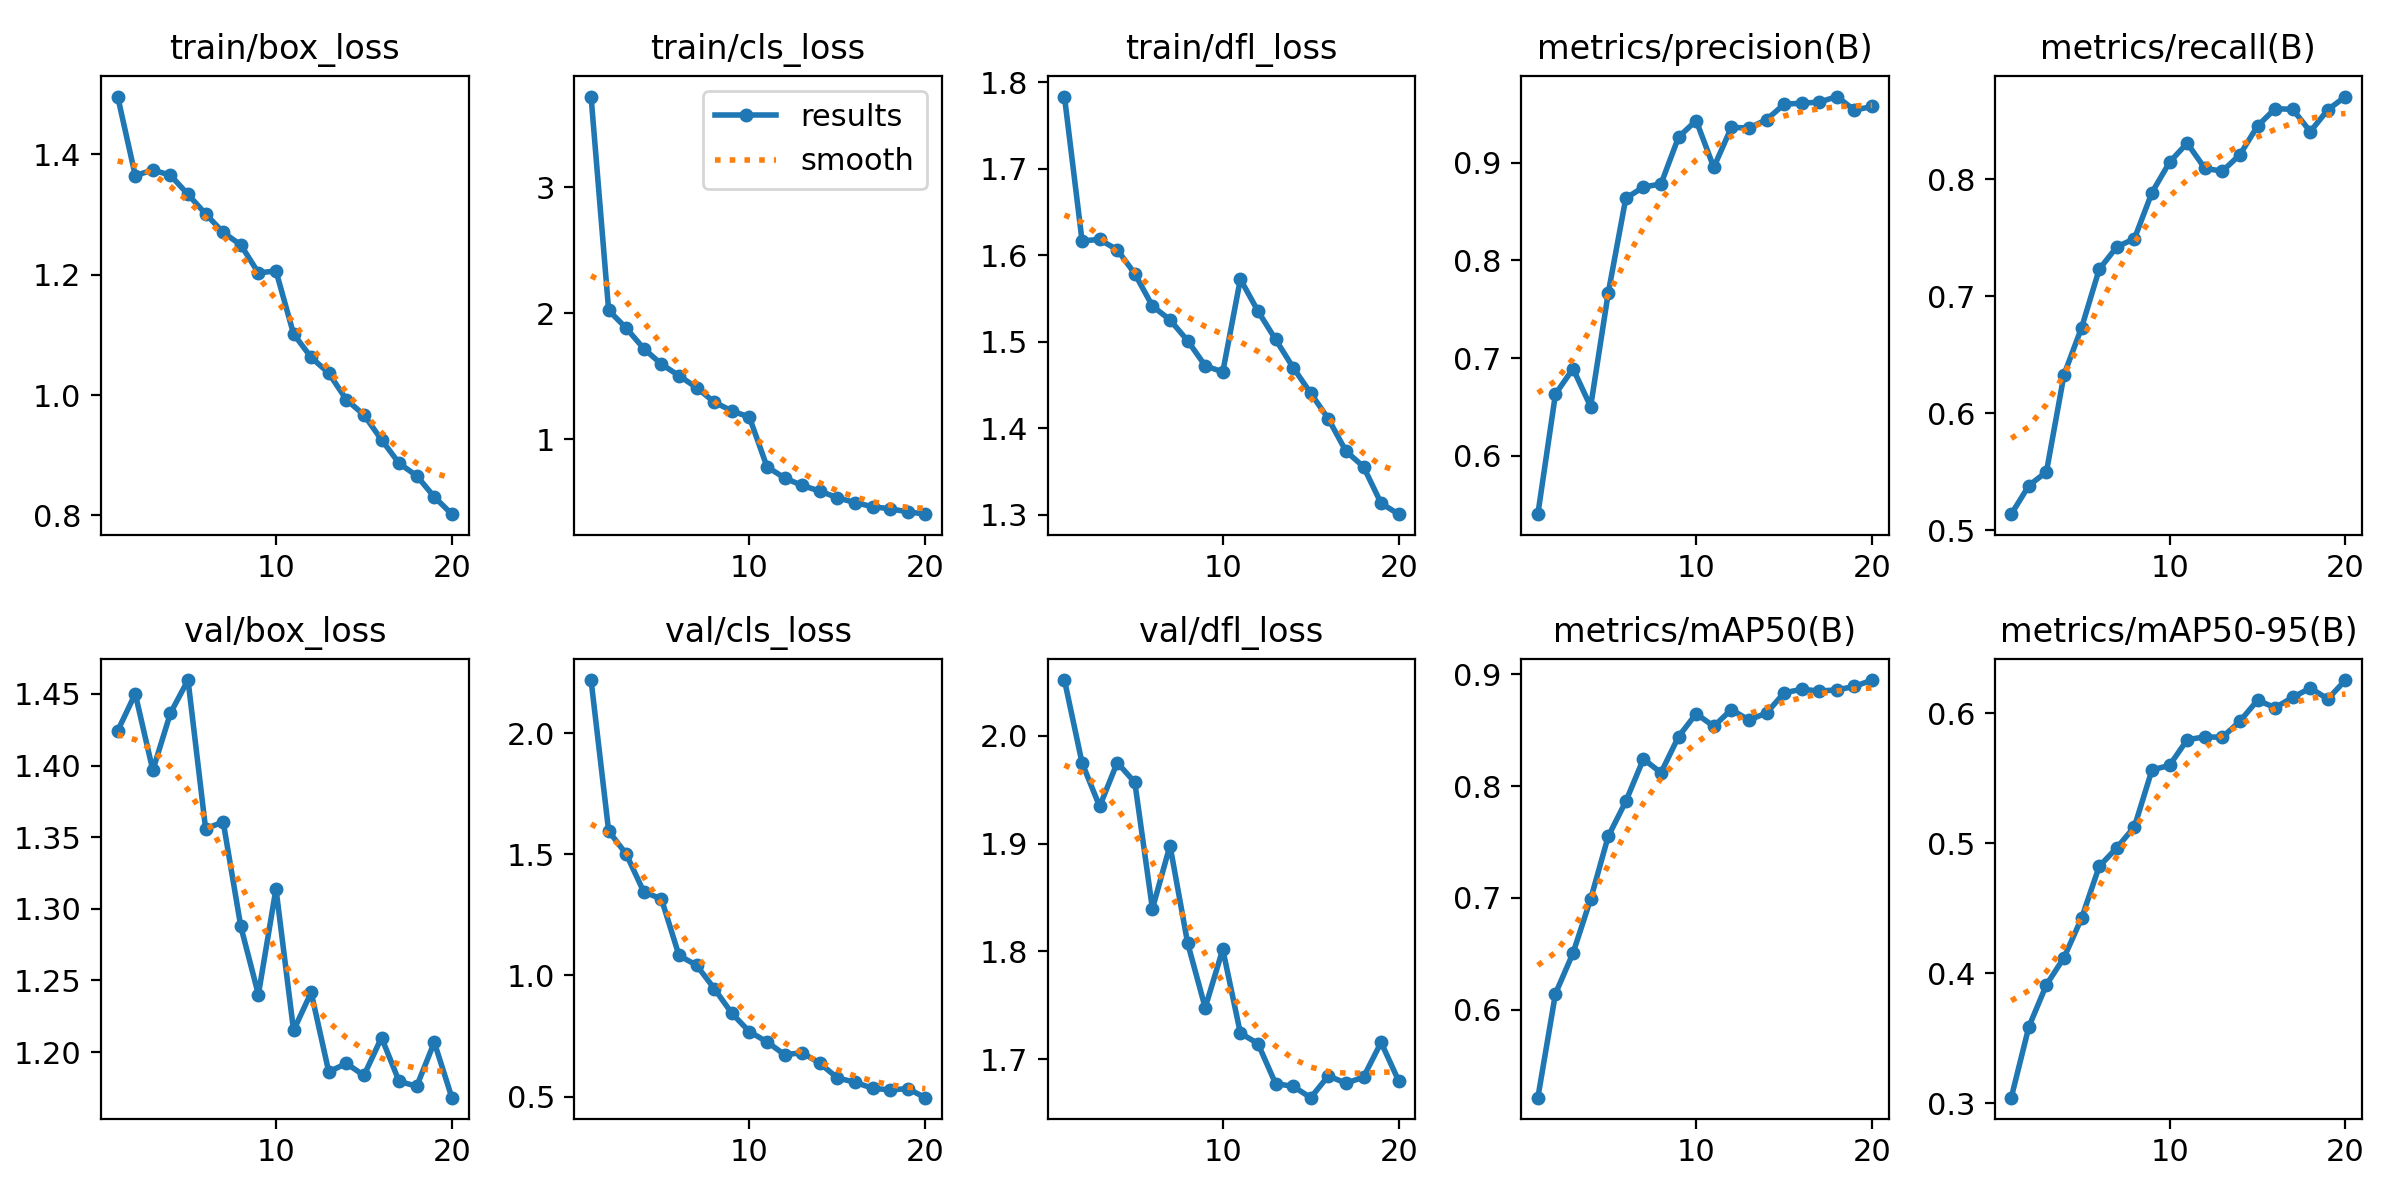

In [17]:
%cd {Home}

Image(filename=f'{Home}/runs/detect/train/results.png', width=800)

/content


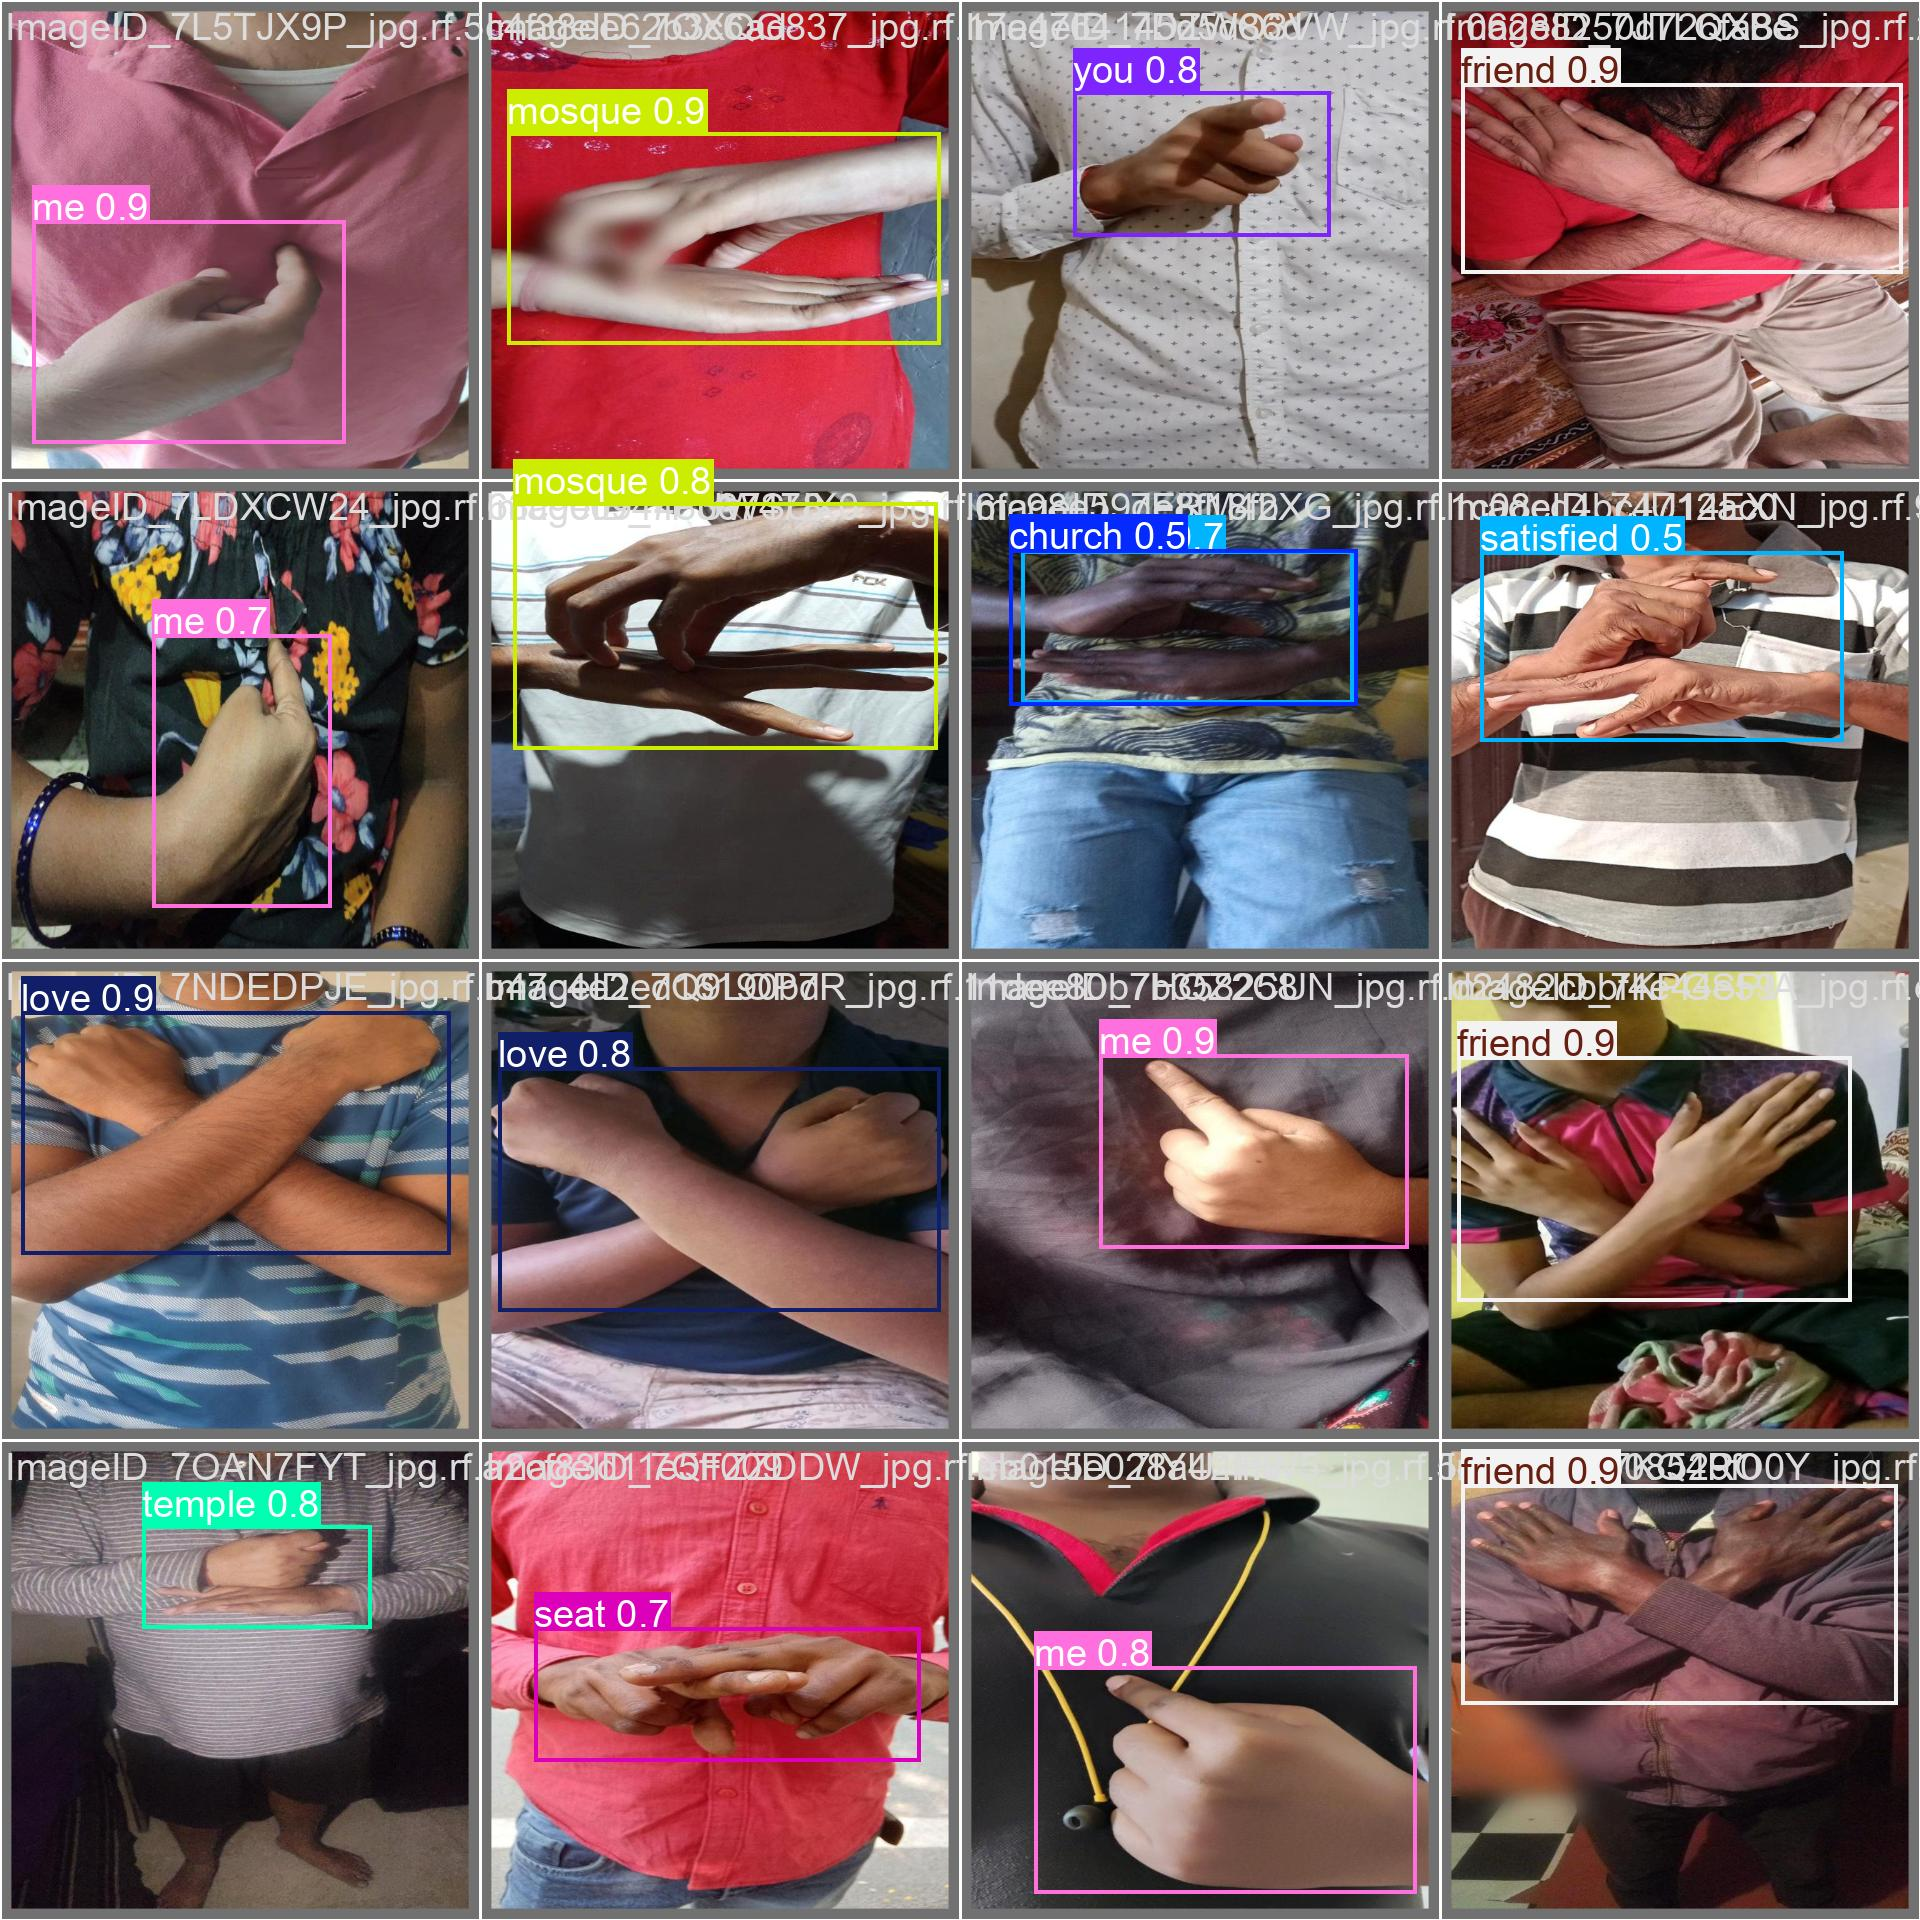

In [18]:
%cd {Home}

Image(filename=f'{Home}/runs/detect/train/val_batch0_pred.jpg', width=600)

Validating the model

In [19]:
%cd {Home}

!yolo task=detect mode=val model={Home}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,131,776 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/ksl_sign_language_detection-2/valid/labels.cache... 374 images, 1 backgrounds, 0 corrupt: 100% 374/374 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 24/24 [00:06<00:00,  3.51it/s]
                   all        374        391      0.957      0.871      0.895      0.625
                church         21         24       0.95      0.785      0.871       0.69
                coffee         15         15      0.977          1      0.995      0.823
                friend         26         30      0.986      0.833       0.89      0.569
                  good          1          1          1          0     0.0663     0.0265
                  love         27         27      0.957          1      0.994      0.718
              

Inference of the model


In [20]:
%cd {Home}

!yolo task=detect mode=predict model={Home}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,131,776 parameters, 0 gradients, 28.5 GFLOPs

image 1/187 /content/datasets/ksl_sign_language_detection-2/test/images/20180624_235317_jpg.rf.7568cd66a56516cdf15270746dc3f63e.jpg: 640x640 1 coffee, 1 tea, 21.1ms
image 2/187 /content/datasets/ksl_sign_language_detection-2/test/images/20180625_200009_jpg.rf.0d1e3d52da9f43e83df3ddf602fd15d5.jpg: 640x640 1 spoon, 16.3ms
image 3/187 /content/datasets/ksl_sign_language_detection-2/test/images/20180625_201735_jpg.rf.75170e35809e572039ae682b4cec0dfb.jpg: 640x640 1 coffee, 16.3ms
image 4/187 /content/datasets/ksl_sign_language_detection-2/test/images/20180625_220112_jpg.rf.885a0237016de475f45d269eb027f783.jpg: 640x640 1 spoon, 16.2ms
image 5/187 /content/datasets/ksl_sign_language_detection-2/test/images/20180625_220203_jpg.rf.65e74e722db155d1b462298c5469bedb.jpg: 640x640 1 okay, 16.3ms
image 6/187 /content/datasets/ks

In [21]:
for img_path in glob.glob(f'{Home}/runs/detect/predict2/*.jpg')[:3]:
  display(Image(filename=img_path, width=500))
  print("\n")

Hyperparameter tuning


In [38]:
!pip install -U albumentations

In [30]:
%cd {Home}

!yolo task=detect mode=train model={Home}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 augment=True batch=32 lr0=0.005 momentum=0.937 weight_decay=0.0005 patience=100

/content
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train/weights/best.pt, data=/content/datasets/ksl_sign_language_detection-2/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_c

In [31]:
!ls {Home}/runs/detect/train4/

args.yaml					     R_curve.png	  val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	  val_batch0_pred.jpg
confusion_matrix.png				     results.png	  val_batch1_labels.jpg
events.out.tfevents.1736661467.5265d65e9260.14961.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					     train_batch1.jpg	  val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch2.jpg	  val_batch2_pred.jpg
labels.jpg					     train_batch3480.jpg  weights
P_curve.png					     train_batch3481.jpg
PR_curve.png					     train_batch3482.jpg


/content


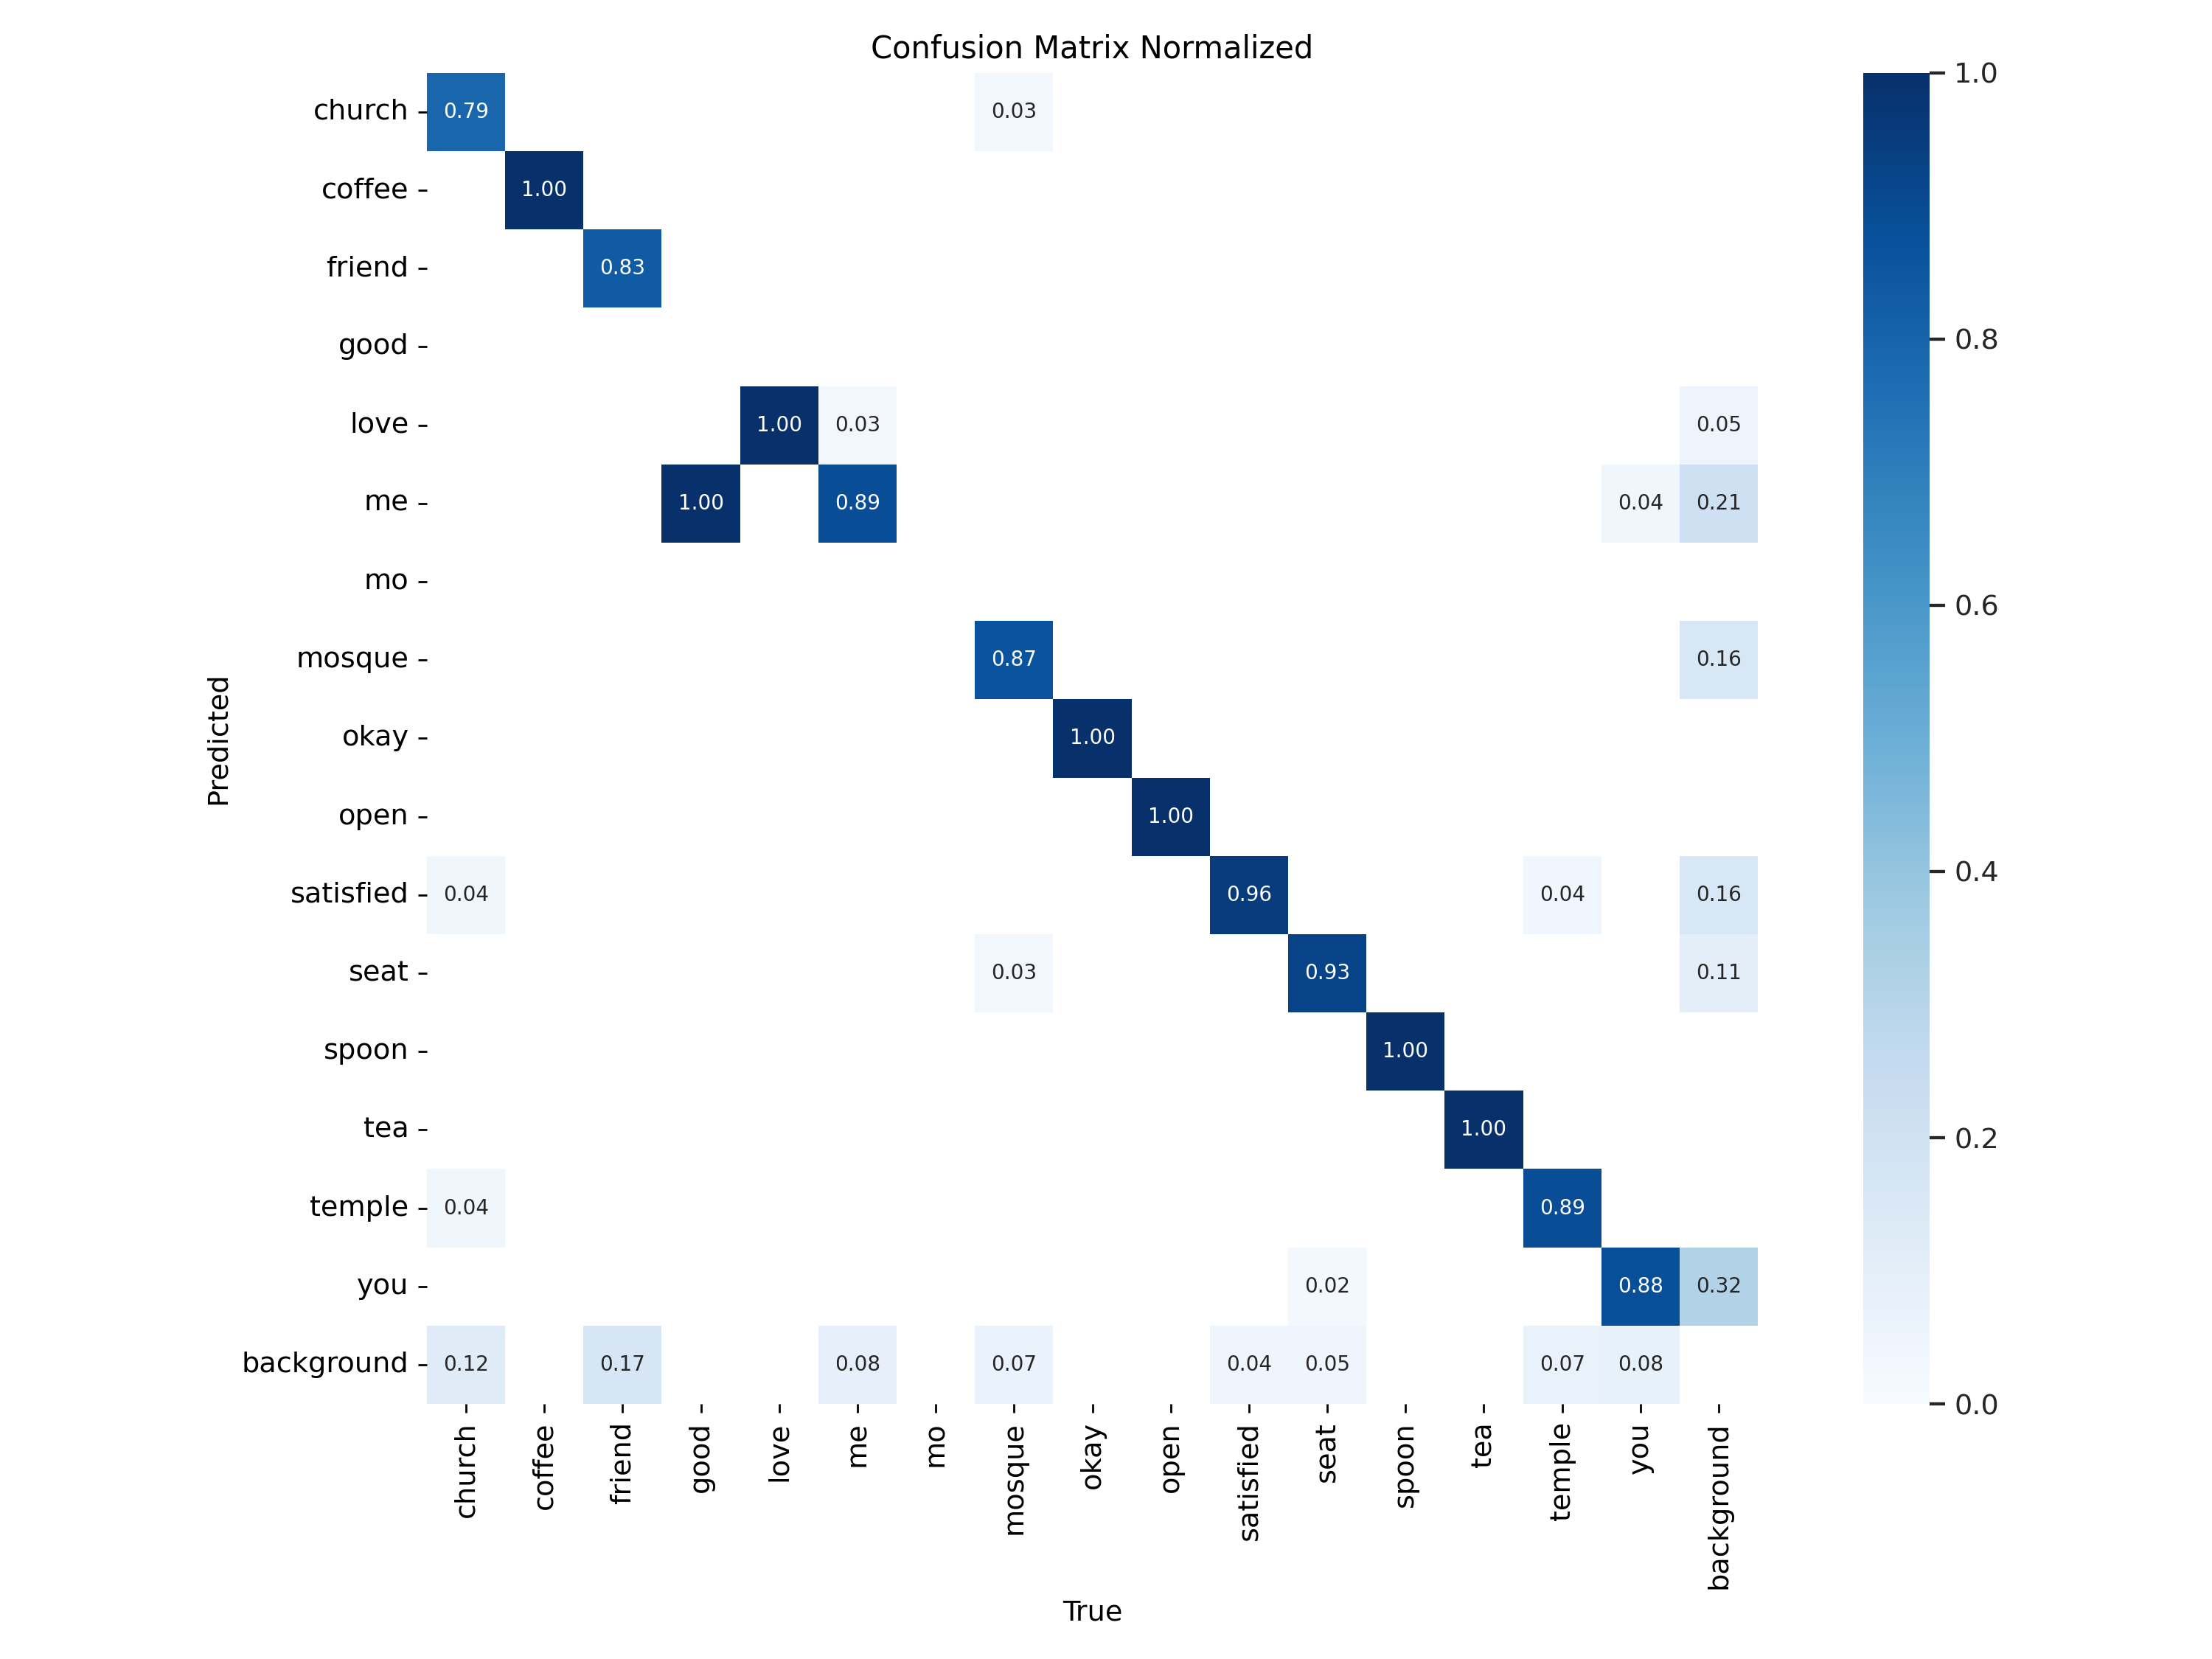

In [33]:
%cd {Home}

Image(filename=f'{Home}/runs/detect/train/confusion_matrix_normalized.png', width=800)

/content


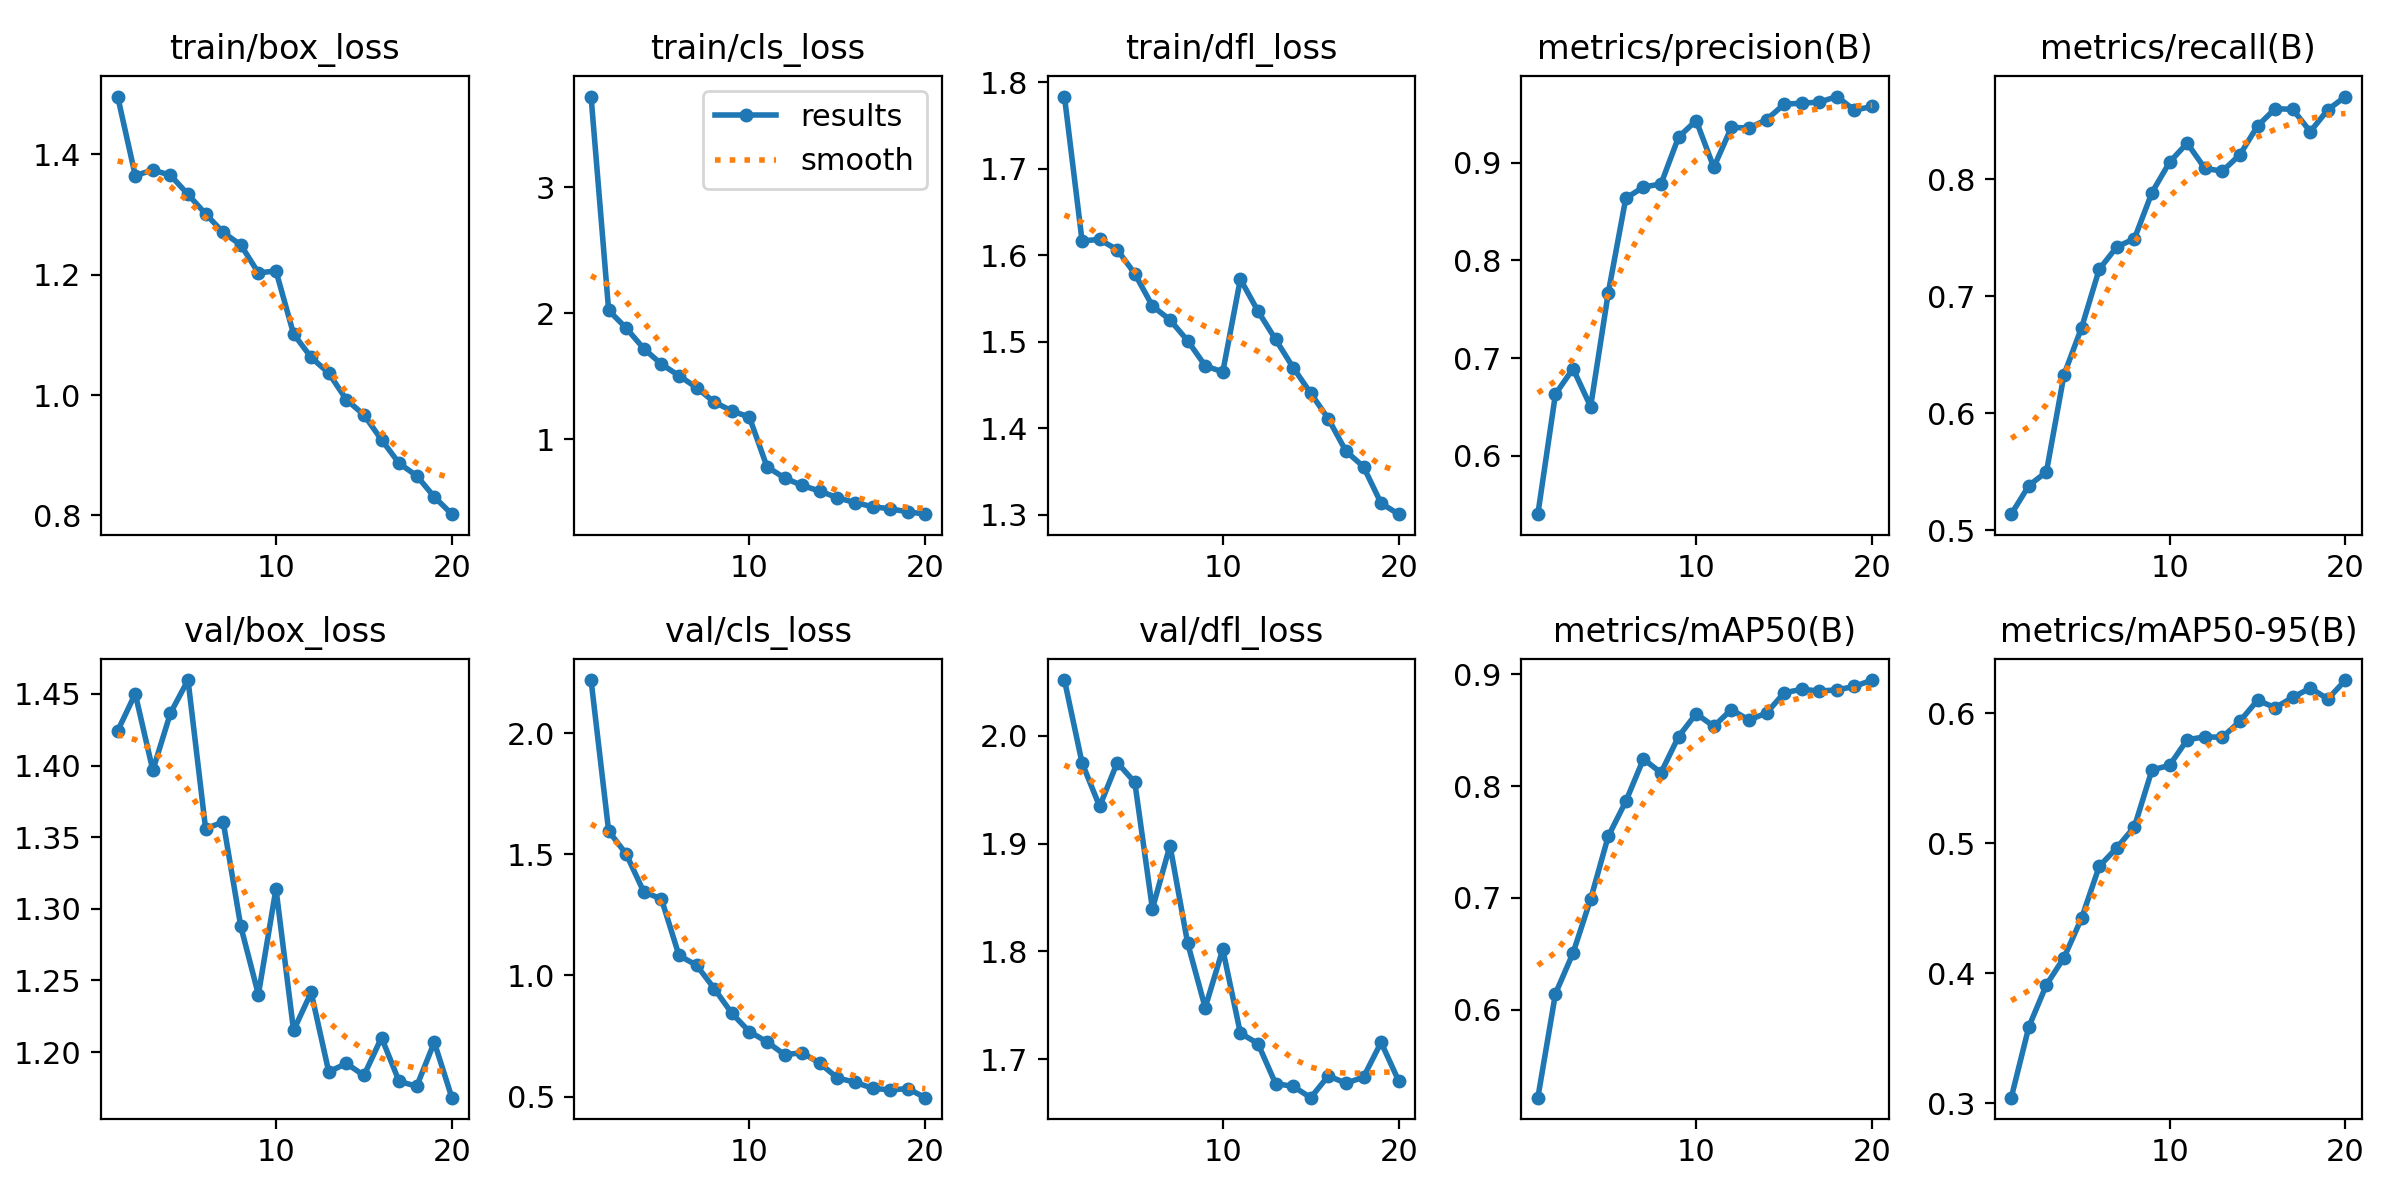

In [35]:
%cd {Home}

Image(filename=f'{Home}/runs/detect/train/results.png', width=800)

/content


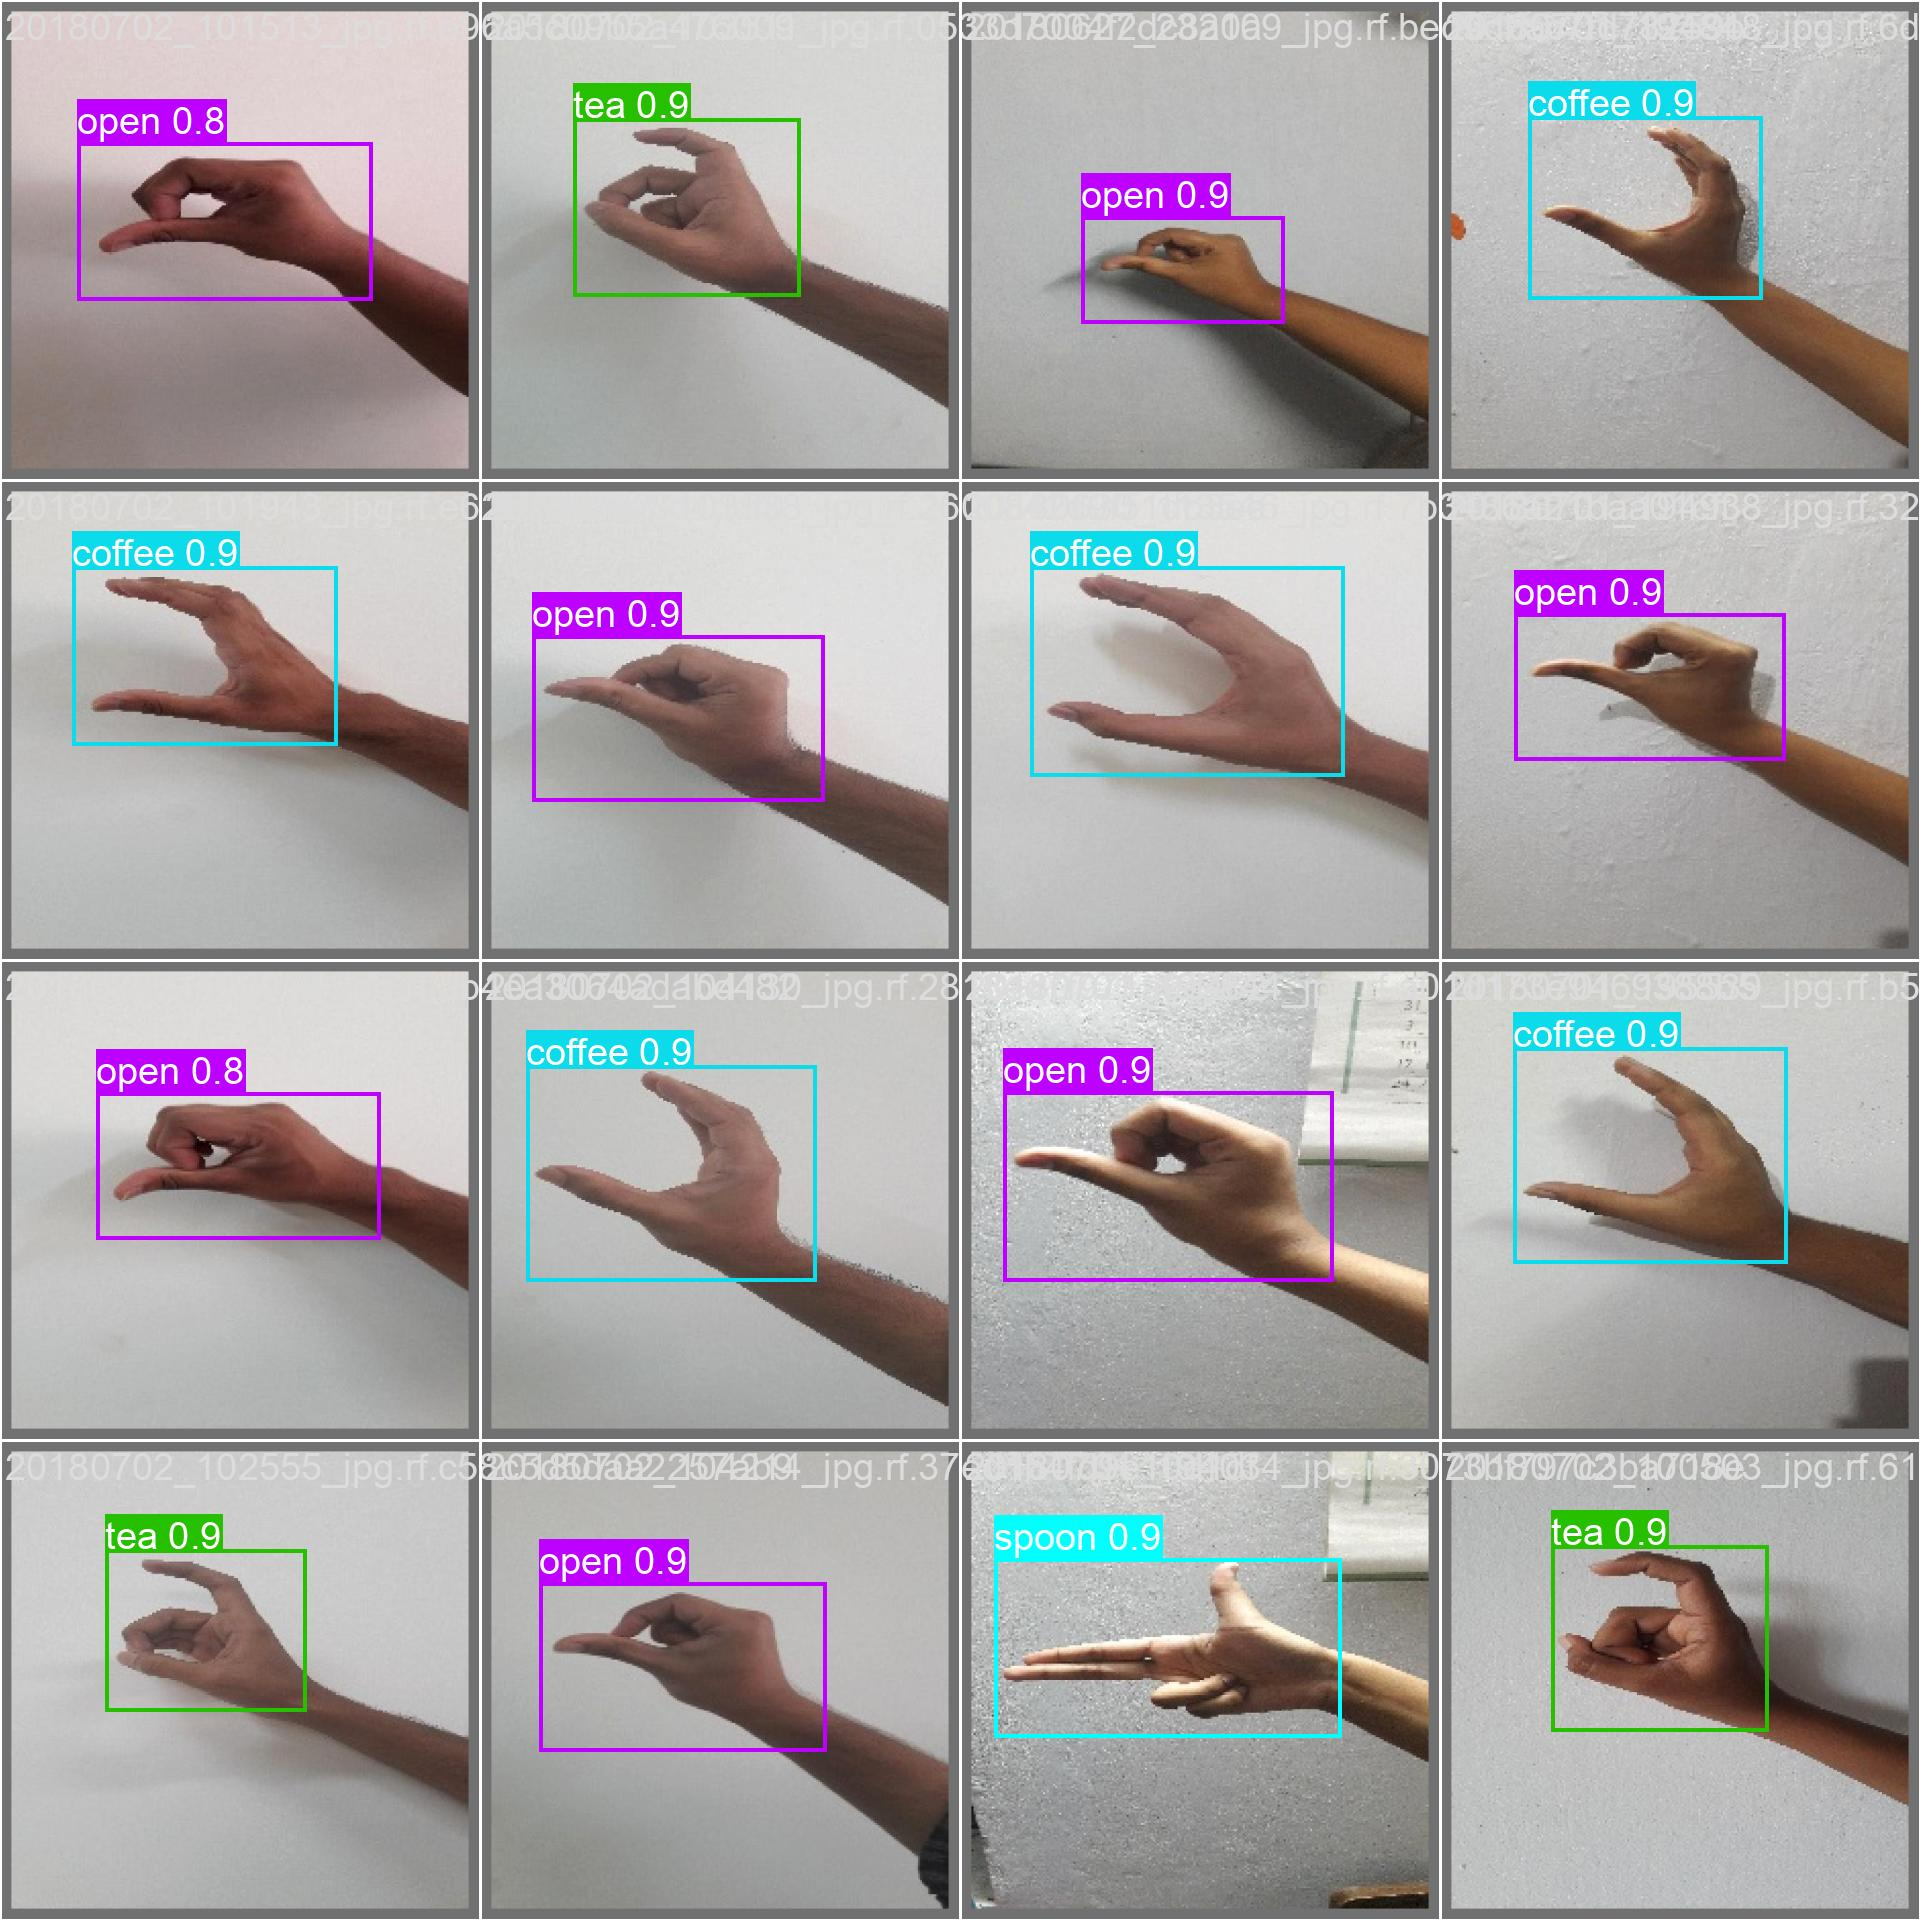

In [37]:
%cd {Home}

Image(filename=f'{Home}/runs/detect/train/val_batch1_pred.jpg', width=600)

In [41]:
%cd {Home}

!yolo task=detect mode=predict model={Home}/runs/detect/train/weights/best.pt conf=0.25 source=/content/demo.mp4

/content
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,131,776 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (frame 1/267) /content/demo.mp4: 480x640 (no detections), 39.8ms
video 1/1 (frame 2/267) /content/demo.mp4: 480x640 (no detections), 13.2ms
video 1/1 (frame 3/267) /content/demo.mp4: 480x640 (no detections), 13.2ms
video 1/1 (frame 4/267) /content/demo.mp4: 480x640 (no detections), 13.1ms
video 1/1 (frame 5/267) /content/demo.mp4: 480x640 1 you, 13.2ms
video 1/1 (frame 6/267) /content/demo.mp4: 480x640 1 you, 13.2ms
video 1/1 (frame 7/267) /content/demo.mp4: 480x640 1 coffee, 13.1ms
video 1/1 (frame 8/267) /content/demo.mp4: 480x640 1 coffee, 13.1ms
video 1/1 (frame 9/267) /content/demo.mp4: 480x640 1 coffee, 13.1ms
video 1/1 (frame 10/267) /content/demo.mp4: 480x640 1 coffee, 13.1ms
video 1/1 (frame 11/267) /content/demo.mp4: 480x640 1 coffee, 13.1ms
video 1/1 (frame 12/267) /content/demo.mp4: 480x640 1

In [45]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [51]:
from IPython.display import HTML, display
from base64 import b64encode
import os
import subprocess # Import subprocess

path = '/content/runs/detect/predict2/demo.avi'
compressed_path = '/content/result_compressed.mp4'

# Use subprocess.run for better error handling and to use the correct codec: libx264
# Capture stdout and stderr for debugging
result = subprocess.run(['ffmpeg', '-i', path, '-vcodec', 'libx264', compressed_path], capture_output=True, text=True)

# Check for errors
if result.returncode != 0:
    print("Error during video compression:")
    print(result.stderr)  # Print ffmpeg's error message
else:
    mp4 = open(compressed_path, 'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    # Create an HTML object instead of calling HTML as a function
    display(HTML("""<video width=400 controls><source src="%s" type="video/mp4"></video>""" % data_url))
